## Exploring the Data

In [1]:
import pandas as pd
import geopandas as gpd

#override max columns displayed
pd.set_option('display.max_columns', None)


In [2]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
path = '../data/consolidated/'
weather_data = pd.read_csv(path+'consolidated_weather_from_centroids.csv')
columns = list(weather_data.columns)
columns[0] = 'Hour'
weather_data.columns = columns

In [4]:
weather_data.head()

,Hour,valid_time,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file
0,0,2003-01-01 00:00:00,4.169556,-1.214157,259.06860,262.64050,0.0,1.907349e-06,48.75,-82.0,Northeast_centroid_weather
1,1,2003-01-01 01:00:00,4.098358,-1.437256,259.24854,262.53380,0.0,9.536743e-07,48.75,-82.0,Northeast_centroid_weather
2,2,2003-01-01 02:00:00,4.197708,-1.892502,258.54254,261.63712,0.0,3.814697e-06,48.75,-82.0,Northeast_centroid_weather
3,3,2003-01-01 03:00:00,3.741165,-2.575897,255.86873,258.89398,0.0,8.583069e-06,48.75,-82.0,Northeast_centroid_weather
4,4,2003-01-01 04:00:00,3.124802,-2.671005,255.42903,258.67328,0.0,9.536743e-06,48.75,-82.0,Northeast_centroid_weather


Checking if the centroids fall in the shape map.

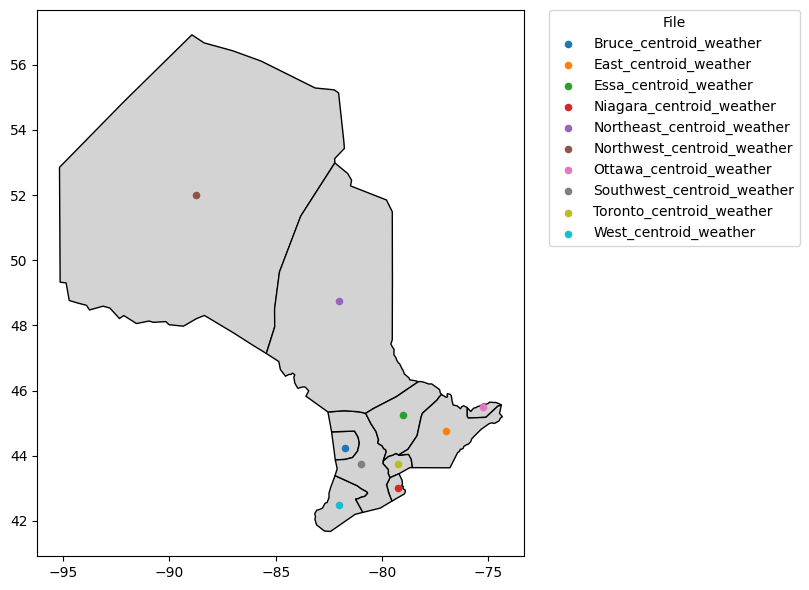

In [5]:
import matplotlib.pyplot as plt
import geopandas as gpd

# read data
shapemap = gpd.read_file('../data/tenzones_ieso.geojson')
centroids = weather_data[['longitude', 'latitude', 'file']].drop_duplicates()

fig, ax = plt.subplots(figsize=(8, 6))

# plot map
shapemap.plot(ax=ax, color='lightgrey', edgecolor='black')

# plot centroids by file
for file_name, group in centroids.groupby('file'):
    ax.scatter(
        group['longitude'],
        group['latitude'],
        s=20,
        label=file_name
    )

# legend **outside** to the right
ax.legend(
    title="File",
    bbox_to_anchor=(1.05, 1),   # x, y position relative to the axes
    loc='upper left',
    borderaxespad=0
)

plt.tight_layout()
plt.show()


In [6]:
# now read demand data
demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')
demand_data.head()

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_61270/3917683950.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  demand_data = pd.read_csv(path+'consolidatedIESOdemand.csv')


,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [7]:
demand_data.head()

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year
0,2003-05-01,1,13702,809,1284,965,765,4422,622,41,2729,617,1611,13865,163,2003
1,2003-05-01,2,13578,825,1283,923,752,4340,602,43,2731,615,1564,13678,100,2003
2,2003-05-01,3,13411,834,1277,910,751,4281,591,45,2696,596,1553,13534,123,2003
3,2003-05-01,4,13501,835,1277,922,758,4281,599,41,2724,609,1544,13590,89,2003
4,2003-05-01,5,14010,847,1268,993,804,4469,643,51,2842,579,1592,14088,78,2003


In [8]:
demand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196391 entries, 0 to 196390
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Date            196391 non-null  object
 1   Hour            196391 non-null  int64 
 2   Ontario Demand  196391 non-null  int64 
 3   Northwest       196391 non-null  int64 
 4   Northeast       196391 non-null  int64 
 5   Ottawa          196391 non-null  int64 
 6   East            196391 non-null  int64 
 7   Toronto         196391 non-null  int64 
 8   Essa            196391 non-null  int64 
 9   Bruce           196391 non-null  int64 
 10  Southwest       196391 non-null  int64 
 11  Niagara         196391 non-null  int64 
 12  West            196391 non-null  int64 
 13  Zone Total      196391 non-null  int64 
 14  Diff            196391 non-null  object
 15  Year            196391 non-null  int64 
dtypes: int64(14), object(2)
memory usage: 24.0+ MB


Now for the price data

In [9]:
price_data = pd.read_csv(path+'prices_zonal.csv')

In [10]:
%pip install duckdb

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Data Cleaning and Feature Engineering

In [11]:
# convert fromm kelvin to celsius
weather_data['temp_C_t2m'] = weather_data['t2m'] - 273.15

In [12]:
# show average temperatures
pd.set_option('display.float_format', lambda x: '%.9f' % x)
weather_data['temp_C_t2m'].describe()

count   2004720.000000000
mean          6.662419457
std          11.948470872
min         -45.063900000
25%          -1.136880000
50%           7.163570000
75%          16.441212500
max          37.167720000
Name: temp_C_t2m, dtype: float64

In [13]:
import sys
import importlib

sys.path.append('../scripts/')
import FeatureEngineering
importlib.reload(FeatureEngineering)

dataset = FeatureEngineering.CleanedDataset(weather_data, demand_data, price_data)

In [14]:
datamerged = dataset.merge_datasets()
datamerged.sort_values(by=['file', 'Date']).head(48)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
1164169,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,2004,10.436722000,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,1,31.910000000,23.100000000,19.840000000,22.920000000,23.810000000,27.390000000,27.630000000,32.240000000,30.640000000,31.260000000,29.200000000,30.340000000,30.610000000,31.260000000,30.670000000
1164170,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,2004,10.491440000,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2,29.550000000,21.390000000,18.370000000,21.230000000,22.040000000,25.360000000,25.590000000,29.850000000,28.380000000,28.950000000,27.040000000,28.100000000,28.340000000,28.950000000,28.400000000
1164171,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,2004,9.877060000,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,3,27.680000000,20.040000000,17.210000000,19.890000000,20.650000000,23.760000000,23.970000000,27.970000000,26.580000000,27.120000000,25.330000000,26.320000000,26.550000000,27.120000000,26.610000000
1164172,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,2004,8.785461000,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,4,25.520000000,18.470000000,15.870000000,18.340000000,19.040000000,21.910000000,22.100000000,25.790000000,24.510000000,25.000000000,23.350000000,24.260000000,24.480000000,25.000000000,24.530000000
1164173,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,2004,7.959579500,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,5,24.750000000,17.910000000,15.390000000,17.780000000,18.460000000,21.240000000,21.430000000,25.000000000,23.770000000,24.250000000,22.650000000,23.530000000,23.740000000,24.250000000,23.790000000
1164174,2004-01-01 05:00:00,6,13354,776,1351,1034,829,3966,716,52,2551,531,1509,13315,-39,2004,8.172653000,-3.857940700,269.578670000,274.278600000,0.000000000,0.000021935,44.250000000,-81.750000000,Bruce_centroid_weather,1.128600000,6,31.130000000,22.540000000,19.350000000,22.370000000,23.230000000,26.720000000,26.960000000,31.450000000,29.890000000,30.500000000,28.490000000,29.600000000,29.870000000,30.500000000,29.920000000
1164175,2004-01-01 06:00:00,7,13462,777,1339,1067,862,4023,742,57,2587,455,1531,13440,-22,2004,8.050049000,-3.897705000,269.640720000,274.337700000,0.000000000,0.000021458,44.250000000,-81.750000000,Bruce_centroid_weather,1.187700000,7,32.870000000,23.800000000,20.440000000,23.620000000,24.530000000,28.220000000,28.470000000,33.220000000,31.570000000,32.210000000,30.080000000,31.260000000,31.540000000,32.210000000,31.600000000
1164176,2004-01-01 07:00:00,8,13538,756,1334,1135,857,4082,774,58,2623,460,1557,13636,98,2004,7.448654000,-4.284515400,269.600280000,274.449400000,0.000000000,0.000009060,44.250000000,-81.750000000,Bruce_centroid_weather,1.299400000,8,21.250000000,15.380000000,13.210000000,15.270000000,15.860000000,18.240000000,18.400000000,21.470000000,20.410000000,20.820000000,19.440000000,20.210000000,20.390000000,20.820000000,20.430000000
1164177,2004-01-01 08:00:00,9,13675,764,1347,1216,842,4112,813,58,2665,454,1555,13826,15

In [15]:
# # make sure that date is unique
# # show non unique dates
# merged_data = dataset.merge_datasets()
# non_unique_dates = merged_data[merged_data.duplicated(subset=['Date'], keep=False)]
# non_unique_dates

In [16]:
datamerged.sort_values(by=['file', 'Date']).head(24)

,Date,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield
1164169,2004-01-01 00:00:00,1,14703,811,1406,1197,903,4606,859,53,2790,542,1670,14837,134,2004,10.436722000,-2.628097500,268.592960000,274.277950000,0.000000000,0.000000954,44.250000000,-81.750000000,Bruce_centroid_weather,1.127950000,1,31.910000000,23.100000000,19.840000000,22.920000000,23.810000000,27.390000000,27.630000000,32.240000000,30.640000000,31.260000000,29.200000000,30.340000000,30.610000000,31.260000000,30.670000000
1164170,2004-01-01 01:00:00,2,14130,805,1412,1095,889,4366,794,53,2698,516,1603,14231,101,2004,10.491440000,-3.361358600,268.799200000,274.068400000,0.000000000,0.000004768,44.250000000,-81.750000000,Bruce_centroid_weather,0.918400000,2,29.550000000,21.390000000,18.370000000,21.230000000,22.040000000,25.360000000,25.590000000,29.850000000,28.380000000,28.950000000,27.040000000,28.100000000,28.340000000,28.950000000,28.400000000
1164171,2004-01-01 02:00:00,3,13575,795,1358,1053,842,4188,747,50,2582,507,1553,13675,100,2004,9.877060000,-4.244293000,269.045650000,274.056100000,0.000000000,0.000012398,44.250000000,-81.750000000,Bruce_centroid_weather,0.906100000,3,27.680000000,20.040000000,17.210000000,19.890000000,20.650000000,23.760000000,23.970000000,27.970000000,26.580000000,27.120000000,25.330000000,26.320000000,26.550000000,27.120000000,26.610000000
1164172,2004-01-01 03:00:00,4,13280,789,1355,1027,817,4046,718,52,2549,517,1512,13382,102,2004,8.785461000,-4.654403700,269.179720000,274.193270000,0.000000000,0.000010490,44.250000000,-81.750000000,Bruce_centroid_weather,1.043270000,4,25.520000000,18.470000000,15.870000000,18.340000000,19.040000000,21.910000000,22.100000000,25.790000000,24.510000000,25.000000000,23.350000000,24.260000000,24.480000000,25.000000000,24.530000000
1164173,2004-01-01 04:00:00,5,13219,779,1354,1018,811,3974,709,50,2534,529,1501,13259,40,2004,7.959579500,-4.542907700,269.336730000,274.298160000,0.000000000,0.000006199,44.250000000,-81.750000000,Bruce_centroid_weather,1.148160000,5,24.750000000,17.910000000,15.390000000,17.780000000,18.460000000,21.240000000,21.430000000,25.000000000,23.770000000,24.250000000,22.650000000,23.530000000,23.740000000,24.250000000,23.790000000
1164174,2004-01-01 05:00:00,6,13354,776,1351,1034,829,3966,716,52,2551,531,1509,13315,-39,2004,8.172653000,-3.857940700,269.578670000,274.278600000,0.000000000,0.000021935,44.250000000,-81.750000000,Bruce_centroid_weather,1.128600000,6,31.130000000,22.540000000,19.350000000,22.370000000,23.230000000,26.720000000,26.960000000,31.450000000,29.890000000,30.500000000,28.490000000,29.600000000,29.870000000,30.500000000,29.920000000
1164175,2004-01-01 06:00:00,7,13462,777,1339,1067,862,4023,742,57,2587,455,1531,13440,-22,2004,8.050049000,-3.897705000,269.640720000,274.337700000,0.000000000,0.000021458,44.250000000,-81.750000000,Bruce_centroid_weather,1.187700000,7,32.870000000,23.800000000,20.440000000,23.620000000,24.530000000,28.220000000,28.470000000,33.220000000,31.570000000,32.210000000,30.080000000,31.260000000,31.540000000,32.210000000,31.600000000
1164176,2004-01-01 07:00:00,8,13538,756,1334,1135,857,4082,774,58,2623,460,1557,13636,98,2004,7.448654000,-4.284515400,269.600280000,274.449400000,0.000000000,0.000009060,44.250000000,-81.750000000,Bruce_centroid_weather,1.299400000,8,21.250000000,15.380000000,13.210000000,15.270000000,15.860000000,18.240000000,18.400000000,21.470000000,20.410000000,20.820000000,19.440000000,20.210000000,20.390000000,20.820000000,20.430000000
1164177,2004-01-01 08:00:00,9,13675,764,1347,1216,842,4112,813,58,2665,454,1555,13826,15

Test to ensure every day has a full 24 hours.

In [17]:
# merged_data['date_only'] = merged_data['Date'].dt.date

# hours_per_day = merged_data.groupby('date_only')['Date'].count()

# incomplete_days = hours_per_day[hours_per_day < 24]
# incomplete_days

In [18]:
# show average load over time
datamerged['Toronto'].describe()

count   1905110.000000000
mean       5799.795471128
std        1028.799832882
min           0.000000000
25%        5004.000000000
50%        5803.000000000
75%        6478.000000000
max       10285.000000000
Name: Toronto, dtype: float64

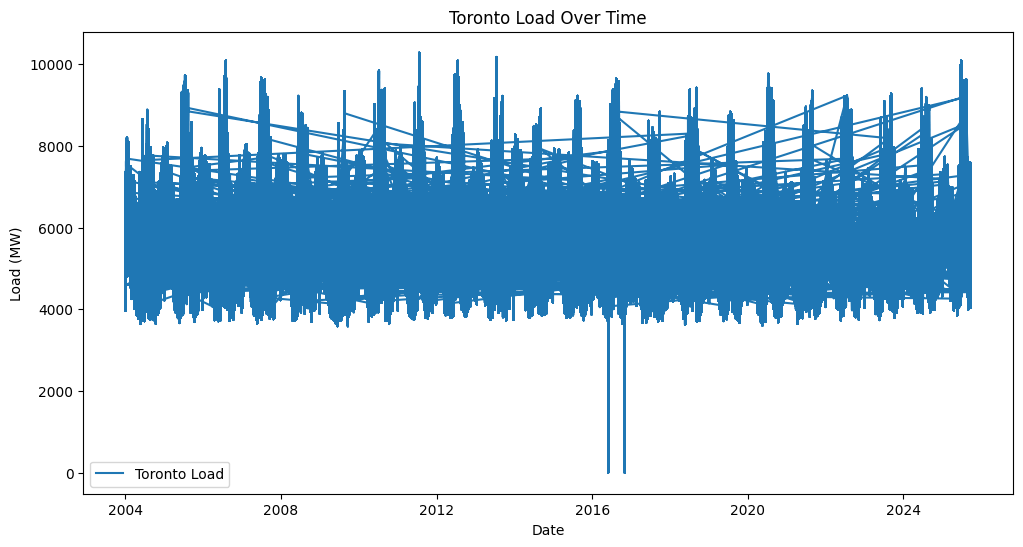

In [19]:
# graph the average prices over time
plt.figure(figsize=(12, 6))
plt.plot(datamerged['Date'], datamerged['Toronto'], label='Toronto Load')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.title('Toronto Load Over Time')
plt.legend()
plt.show()

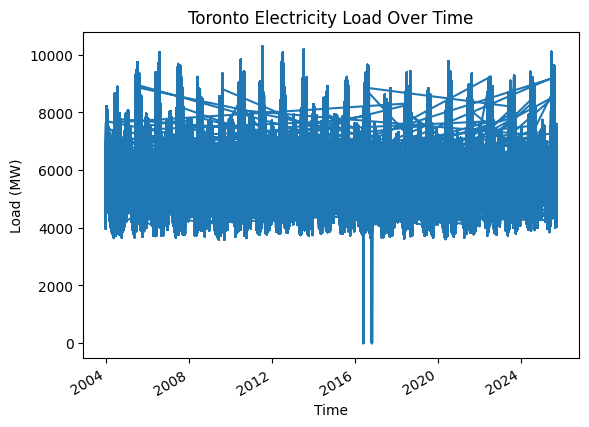

In [20]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# extract the series
prices = datamerged['Toronto']


# datamerged['Date'] = pd.to_datetime(datamerged['Date'])
datamerged.set_index('Date', inplace=True)
loads = datamerged['Toronto']

# 1. Plot the time series
loads.plot(title='Toronto Electricity Load Over Time')
plt.xlabel('Time')
plt.ylabel('Load (MW)')
plt.show()

# 2. Autocorrelation plot to check cyclic patterns
# plot_acf(loads.dropna(), lags=180)  # Increase lags if needed
# plt.title('Autocorrelation of Toronto Electricity Load')
# plt.show()

# plt.show()


In [21]:
datamerged['Toronto'].describe()

count   1905110.000000000
mean       5799.795471128
std        1028.799832882
min           0.000000000
25%        5004.000000000
50%        5803.000000000
75%        6478.000000000
max       10285.000000000
Name: Toronto, dtype: float64

# ARIMAX Model

Building an ARIMAX (AutoRegressive Integrated Moving Average with eXogenous variables) model to predict electricity load usage using weather and demand data as exogenous features.

In [22]:
datamerged = dataset.merge_datasets()

datamerged = dataset.add_calendar_features(datamerged)
datamerged = datamerged[datamerged['file'] == 'Toronto_centroid_weather']
# arimax model

In [23]:
#create dummy variables for hour, month, weekday


print(datamerged.head())
print(datamerged.columns)


datamerged['Date'] = pd.to_datetime(datamerged['Date'])

# create dummy variables for hour, month, weekday
datamerged['hour'] = datamerged['Date'].dt.hour
datamerged['month'] = datamerged['Date'].dt.month
datamerged['weekday'] = datamerged['Date'].dt.weekday

# one hot
dummies = pd.get_dummies(datamerged[['hour', 'month', 'weekday']], columns=['hour', 'month', 'weekday'], prefix=['hour', 'month', 'weekday'])


datamerged = pd.concat([datamerged, dummies], axis=1)


print(datamerged.columns)

print(datamerged.filter(regex='hour_|month_|weekday_').head())

                       Date  Hour  Ontario Demand  Northwest  Northeast  \
1059609 2014-06-14 08:00:00     8           13929        455       1068   
1059610 2014-06-14 09:00:00     9           14332        472       1123   
1059611 2014-06-14 10:00:00    10           14559        487       1129   
1059612 2014-06-14 11:00:00    11           14596        439       1125   
1059613 2014-06-14 12:00:00    12           14385        401       1105   

         Ottawa  East  Toronto  Essa  Bruce  Southwest  Niagara  West  \
1059609     743   948     5128   805     81       2818      421  1387   
1059610     782   974     5371   822     79       2867      436  1379   
1059611     804   965     5517   808     80       2901      447  1362   
1059612     818   981     5560   798     78       2887      438  1361   
1059613     808   937     5548   764     77       2864      424  1341   

         Zone Total  Diff  Year         u10          v10           d2m  \
1059609       13855   -74  2014 5.52

In [24]:
datamerged.shape

(190511, 92)

In [25]:
# the range of dates we can use for training and testing. this is to stop it from taking forever.

datamerged = datamerged[
    (datamerged['Date'].dt.year >= 2018) & 
    (datamerged['Date'].dt.year <= 2024)
]


In [26]:
datamerged.shape

(61368, 92)

In [ ]:
# ============================================================================
# Reusable Data Preparation Pipeline should work for all the data models
# ============================================================================

def prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=None,
    extra_lags=None,  # list of tuples: (original_col, new_name, lag_hours)
    test_weeks=1,
    include_daily_seasonality=True
):
    """
    Prepare Toronto load data for time series modeling.
    
    parameters:
    datamerged : pd.DataFrame
        The merged dataset with all features
    zone : str
        Location identifier to filter by
    weather_vars : list, optional
        List of weather variables to use.
    extra_lags : list of tuples, optional
        Each tuple: (column_name, new_column_name, lag_hours)
    test_weeks : int
        Number of weeks for test set (default: 1 week = 168 hours)
    include_daily_seasonality : bool
        Whether to include daily sin/cos features (default: True)
    
    Returns:
    --------
    dict containing:
        - 'train': training dataset with datetime index
        - 'test': test dataset with datetime index
        - 'target_train': target variable for training
        - 'target_test': target variable for testing
        - 'exog_features': list of exogenous feature column names
        - 'toronto_data': full processed dataset
    """
    
    if weather_vars is None:
        weather_vars = ['temp_C_t2m', 'u10', 'tp']
    if extra_lags is None:
        extra_lags = []
    
    hours_per_week = 168
    
    # --- Filter and prepare ---
    toronto_data = datamerged[datamerged['file'] == zone].copy()
    toronto_data['Date'] = pd.to_datetime(toronto_data['Date'])
    toronto_data = toronto_data.set_index('Date').sort_index()
    
    # --- Time index for sin/cos ---
    toronto_data["t"] = np.arange(len(toronto_data))
    
    # Weekly seasonality
    period_weekly = 24 * 7
    toronto_data["sin_wk"] = np.sin(2 * np.pi * toronto_data["t"] / period_weekly)
    toronto_data["cos_wk"] = np.cos(2 * np.pi * toronto_data["t"] / period_weekly)
    
    # Daily seasonality (optional)
    if include_daily_seasonality:
        toronto_data["sin_day"] = np.sin(2 * np.pi * toronto_data["t"] / 24)
        toronto_data["cos_day"] = np.cos(2 * np.pi * toronto_data["t"] / 24)
    
    # --- Lag weather variables by 1 week ---
    for var in weather_vars:
        toronto_data[f'{var}_lag1w'] = toronto_data[var].shift(168)
    
    # --- Lag extra columns by custom hours ---
    for col, new_name, lag_hours in extra_lags:
        toronto_data[new_name] = toronto_data[col].shift(lag_hours)
    
    # --- Drop rows with NaN after lagging ---
    cols_to_check = [f'{v}_lag1w' for v in weather_vars] + ['Toronto']
    if extra_lags:
        cols_to_check += [new_name for _, new_name, _ in extra_lags]
    toronto_data = toronto_data.dropna(subset=cols_to_check)
    
    # --- Extract dummy variables ---
    hour_dummies = [c for c in toronto_data.columns if c.startswith('hour_')][1:]
    month_dummies = [c for c in toronto_data.columns if c.startswith('month_')][1:]
    weekday_dummies = [c for c in toronto_data.columns if c.startswith('weekday_')][1:]
    
    # --- Build exogenous features list ---
    seasonal_features = ["sin_wk", "cos_wk"]
    if include_daily_seasonality:
        seasonal_features += ['sin_day', 'cos_day']

    exog_features = (
        hour_dummies +
        month_dummies +
        weekday_dummies +
        [f'{v}_lag1w' for v in weather_vars] +
        seasonal_features
    )
    
    # Add IsHoliday if it exists in the data
    if 'IsHoliday' in toronto_data.columns:
        exog_features += ['IsHoliday']
    
    if extra_lags:
        exog_features += [new_name for _, new_name, _ in extra_lags]
    
    # --- Train/test split ---
    train = toronto_data.iloc[:-hours_per_week * test_weeks]
    test = toronto_data.iloc[-hours_per_week * test_weeks:]
    
    # --- Ensure numeric for exogenous features ---
    for df in [train, test]:
        df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
    
    target_train = train['Toronto'].astype(float)
    target_test = test['Toronto'].astype(float)
    
    return {
        'train': train,
        'test': test,
        'target_train': target_train,
        'target_test': target_test,
        'exog_features': exog_features,
        'toronto_data': toronto_data
    }


/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_61270/2794681718.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_61270/2794681718.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/Users/isaacwood/Documents/School/CISC 451/IESO ML P

Rolling ARIMAX RMSE: 470.98


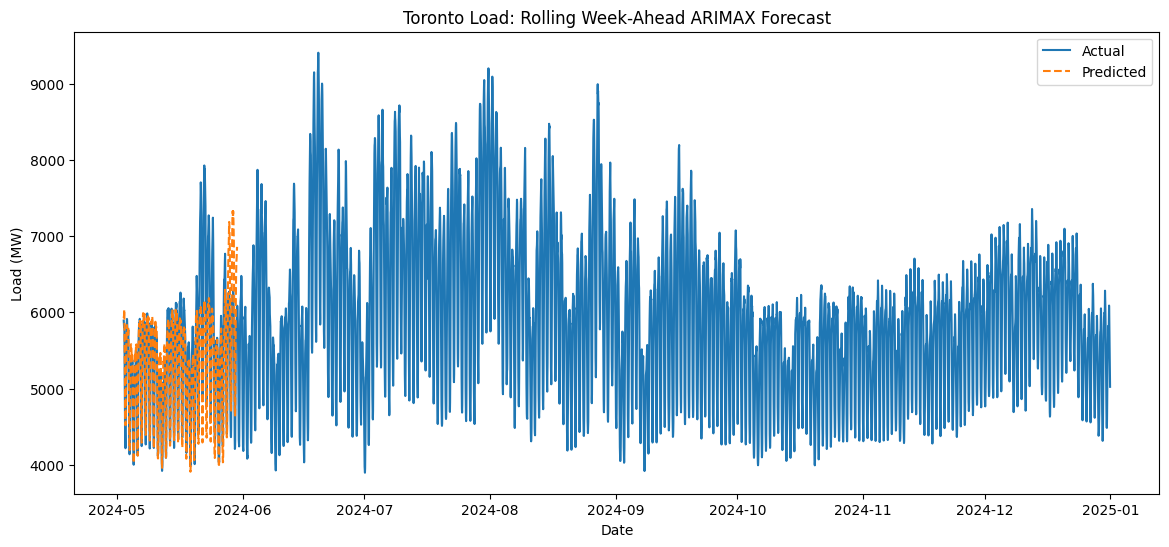

                               SARIMAX Results                                
Dep. Variable:                Toronto   No. Observations:                55360
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -305911.803
Date:                Sat, 22 Nov 2025   AIC                         611929.606
Time:                        15:39:53   BIC                         612402.448
Sample:                    01-08-2018   HQIC                        612077.024
                         - 05-02-2024                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
hour_1             -21.1162      2.040    -10.349      0.000     -25.115     -17.117
hour_2             -37.8674      3.162    -11.974      0.000     -44.066     -31.669
hour_3             -50.5414 

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# ----------------------
# Use your prepared data
# ----------------------
data = prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=['temp_C_t2m', 'u10', 'tp'],
    extra_lags=[
        ('Toronto', '1w_load', 168),
        ('Toronto_Darlington', '1w_price', 168)
    ],
    test_weeks=1,
    include_daily_seasonality=True
)

train = data['train']
test = data['test']
target_train = data['target_train']
target_test = data['target_test']
exog_features = data['exog_features']

# ----------------------
# Rolling week-ahead forecast
# ----------------------
forecast_horizon = 168  # 1 week
max_weeks = 4        # None = forecast full test set

all_pred = []
all_actual = []

test_start_idx = 0
test_end_idx = len(test)
week_count = 0

while test_start_idx < test_end_idx:
    # Slice current week for forecast
    current_end_idx = test_start_idx + forecast_horizon
    if current_end_idx > test_end_idx:
        current_end_idx = test_end_idx  # handle last partial week

    exog_forecast = test[exog_features].iloc[test_start_idx:current_end_idx]

    # Fit ARIMAX on training data
    model = SARIMAX(
        target_train,
        exog=train[exog_features],
        order=(1, 1, 1),
        seasonal_order=(0, 0, 0, 0),
        enforce_stationarity=False,
        enforce_invertibility=False
    )
    results = model.fit(disp=False)

    # Forecast 1 week
    forecast = results.get_forecast(steps=len(exog_forecast), exog=exog_forecast)
    pred_mean = forecast.predicted_mean.values

    # Store predictions and actuals
    all_pred.extend(pred_mean)
    all_actual.extend(target_test.iloc[test_start_idx:current_end_idx].values)

    # Move to next week
    test_start_idx += forecast_horizon
    week_count += 1
    if max_weeks is not None and week_count >= max_weeks:
        break

# ----------------------
# Evaluate
# ----------------------
rmse = np.sqrt(mean_squared_error(all_actual, all_pred))
print(f'Rolling ARIMAX RMSE: {rmse:.2f}')

# ----------------------
# Plot results
# ----------------------
plt.figure(figsize=(14, 6))
plt.plot(test.index, target_test, label='Actual')
plt.plot(test.index[:len(all_pred)], all_pred, linestyle='--', label='Predicted')
plt.title('Toronto Load: Rolling Week-Ahead ARIMAX Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()

# ----------------------
# Last model summary
# ----------------------
print(results.summary())


In [54]:
# Create a corrupted version of test data
test_corrupted = test.copy()
test_corrupted['Toronto'] = -99999  # Impossible values

# If the model uses test['Toronto'], results will change
forecast1 = results.get_forecast(steps=5840, exog=test[exog_features])
forecast2 = results.get_forecast(steps=5840, exog=test_corrupted[exog_features])

# Check if predictions are identical
print("Predictions identical:", np.allclose(forecast1.predicted_mean, forecast2.predicted_mean))
# the predictions being identical implies that the model does not use the target variable from the test set during forecasting (eg for data leakage)

Predictions identical: True


In [55]:
# show model summary
print(rmse)

470.9763124401455


## Bayesian Ridge Regression

/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_61270/2794681718.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)
/var/folders/b8/b4rqhqs11cbcqlzjryxb92lw0000gn/T/ipykernel_61270/2794681718.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[exog_features] = df[exog_features].apply(pd.to_numeric, errors='coerce').fillna(0).astype(float)


Rolling Bayesian Ridge RMSE: 544.19


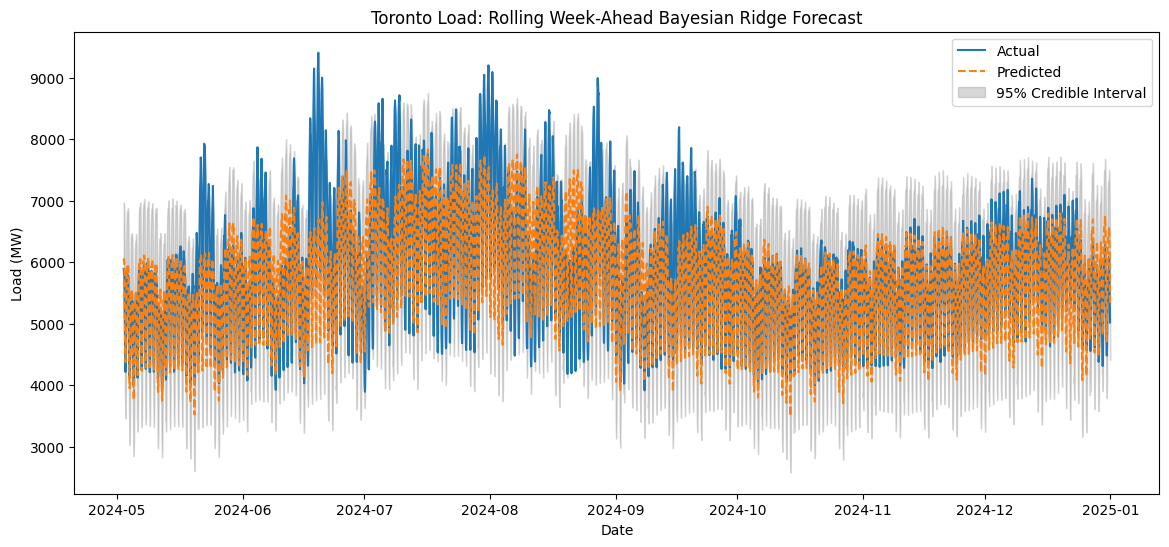

In [64]:
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ----------------------
# Use prepared data
# ----------------------
data = prepare_toronto_load_data(
    datamerged,
    zone='Toronto_centroid_weather',
    weather_vars=['temp_C_t2m', 'u10', 'tp'],
    extra_lags=[  
        ('Toronto', '1w_load', 168),
        ('Toronto_Darlington', '1w_price', 168)
    ],
    test_weeks=1,
    include_daily_seasonality=True
)

train = data['train']
test = data['test']
target_train = data['target_train']
target_test = data['target_test']
exog_features = data['exog_features']

# ----------------------
# Rolling week-ahead forecast with credible intervals
# ----------------------
forecast_horizon = 168  # 1 week
max_weeks = None          # limit number of weeks to forecast

all_pred = []
all_actual = []
all_lower = []
all_upper = []

test_start_idx = 0
test_end_idx = len(test)
week_count = 0

while test_start_idx < test_end_idx:
    # Slice current week
    current_end_idx = test_start_idx + forecast_horizon
    if current_end_idx > test_end_idx:
        current_end_idx = test_end_idx  # handle last partial week

    X_forecast = test[exog_features].iloc[test_start_idx:current_end_idx]

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(train[exog_features].astype(float))
    X_forecast_scaled = scaler.transform(X_forecast.astype(float))

    # Train Bayesian Ridge on training set
    model = BayesianRidge()
    model.fit(X_train_scaled, target_train)

    # Forecast current week with standard deviation
    pred_mean, pred_std = model.predict(X_forecast_scaled, return_std=True)

    # 95% credible interval
    lower = pred_mean - 1.96 * pred_std
    upper = pred_mean + 1.96 * pred_std

    # Store predictions, actuals, intervals
    all_pred.extend(pred_mean)
    all_actual.extend(target_test.iloc[test_start_idx:current_end_idx].values)
    all_lower.extend(lower)
    all_upper.extend(upper)

    # Move to next week
    test_start_idx += forecast_horizon
    week_count += 1
    if max_weeks is not None and week_count >= max_weeks:
        break

# ----------------------
# Evaluate
# ----------------------
rmse = np.sqrt(mean_squared_error(all_actual, all_pred))
print(f'Rolling Bayesian Ridge RMSE: {rmse:.2f}')

# ----------------------
# Plot results with credible intervals
# ----------------------
plt.figure(figsize=(14,6))
plt.plot(test.index, target_test, label='Actual')
plt.plot(test.index[:len(all_pred)], all_pred, linestyle='--', label='Predicted')

plt.fill_between(
    test.index[:len(all_pred)],
    all_lower,
    all_upper,
    color='gray',
    alpha=0.3,
    label='95% Credible Interval'
)

plt.title('Toronto Load: Rolling Week-Ahead Bayesian Ridge Forecast')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()


In [65]:
# show which features are most important
feature_importance = pd.Series(np.abs(model.coef_), index=exog_features)
feature_importance = feature_importance.sort_values(ascending=False)

In [66]:
feature_importance

cos_day            299.508699214
1w_load            287.203751624
month_4            167.229087792
month_10           153.742528551
month_5            147.031270540
sin_day            142.825876768
weekday_6          116.558310519
hour_20            109.303705885
hour_19            107.114672563
weekday_5          105.233402950
month_7            102.310731790
IsHoliday           98.252927758
hour_18             97.221831862
month_3             96.311123197
month_9             95.547042274
hour_21             90.538303966
month_11            84.463905773
cos_wk              83.906625674
hour_17             81.801268279
weekday_3           65.125241037
weekday_2           63.067609312
month_12            63.013506535
sin_wk              62.714694480
hour_16             57.975962511
hour_22             57.258594286
month_8             56.150522639
hour_9              52.840375143
hour_10             51.885875144
hour_8              49.505172184
hour_11             46.209812467
hour_3    

In [67]:
# check what's actually happening with the dates to ensure no leakage.
print(f"Test period start: {test.index[0]}")
print(f"Test period end: {test.index[-1]}")
print(f"Test set size: {len(test)} hours")
print(f"Test set size in days: {len(test) / 24} days")
print(f"Test set size in weeks: {len(test) / 168} weeks")


print(f"\nTrain period end: {train.index[-1]}")
print(f"Test period start: {test.index[0]}")
print(f"Gap between train and test: {test.index[0] - train.index[-1]}")

Test period start: 2024-05-02 16:00:00
Test period end: 2024-12-31 23:00:00
Test set size: 5840 hours
Test set size in days: 243.33333333333334 days
Test set size in weeks: 34.76190476190476 weeks

Train period end: 2024-05-02 15:00:00
Test period start: 2024-05-02 16:00:00
Gap between train and test: 0 days 01:00:00


## Prophet

In [ ]:
%pip install cmdstanpy prophet


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [68]:
import os
import sys
from contextlib import contextmanager

@contextmanager
def suppress_stdout_stderr():
    """Suppress stdout and stderr output."""
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        old_stderr = sys.stderr
        sys.stdout = devnull
        sys.stderr = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout
            sys.stderr = old_stderr


In [69]:
data['test']

,Hour,Ontario Demand,Northwest,Northeast,Ottawa,East,Toronto,Essa,Bruce,Southwest,Niagara,West,Zone Total,Diff,Year,u10,v10,d2m,t2m,ssrd,tp,latitude,longitude,file,temp_C_t2m,Hour_of_Day,Reference_Richview,North West_Atikokan,North West_Pineportage,North West_Thunderbay,North East_Andrews,North East_Canyon,North East_NPIroqfalls,Ottawa_TAOHSC,East_Saunders,Toronto_Darlington,Essa_Desjoachims,Bruce_BruceB,South West_GerdauCam,Niagara_BECK2,West_Greenfield,Month,Day,Weekday,IsHoliday,hour,month,weekday,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,t,sin_wk,cos_wk,sin_day,cos_day,temp_C_t2m_lag1w,u10_lag1w,tp_lag1w,1w_load,1w_price
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-05-02 16:00:00,16,15320,415,1139,939,668,5892,824,109,3096,537,1611,15230,-90,2024,2.899810800,-0.229904170,279.383360000,283.628600000,2997888.000000000,0.000000000,43.750000000,-79.250000000,Toronto_centroid_weather,10.478600000,17,81.740000000,71.080000000,69.270000000,NaN,76.390000000,80.140000000,77.850000000,81.740000000,80.140000000,80.930000000,80.930000000,79.360000000,81.740000000,80.140000000,81.740000000,5,2,3,0.000000000,16,5,3,False,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,False,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,False,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,55528,-0.149042266,-0.988830826,-0.866025404,-0.500000000,3.449980000,-3.300598100,0.000000000,5844.000000000,25.690000000
2024-05-02 17:00:00,17,15444,414,1097,936,795,5857,921,112,3102,535,1660,15427,-17,2024,1.867919900,0.441528320,279.514400000,284.013500000,3262976.000000000,0.000000000,43.750000000,-79.250000000,Toronto_centroid_weather,10.863500000,18,46.460000000,40.400000000,39.380000000,NaN,43.430000000,45.550000000,44.250000000,46.460000000,45.550000000,46.000000000,46.000000000,45.110000000,46.460000000,45.550000000,46.460000000,5,2,3,0.000000000,17,5,3,False,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,False,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,False,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,55529,-0.185911607,-0.982566473,-0.965925826,-0.258819045,3.804600000,-2.897949200,0.000000000,5835.000000000,28.540000000
2024-05-02 18:00:00,18,15521,437,1133,962,881,5809,993,110,3128,527,1688,15668,147,2024,1.879028300,0.674041750,279.675660000,284.386600000,3313472.000000000,0.000000000,43.750000000,-79.250000000,Toronto_centroid_weather,11.236600000,19,22.050000000,19.170000000,18.680000000,NaN,20.610000000,21.610000000,21.000000000,22.050000000,21.610000000,21.830000000,21.830000000,21.400000000,22.050000000,21.610000000,22.050000000,5,2,3,0.000000000,18,5,3,False,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.000000000,0.000000000,0.000000000,False,0.000000000,0.000000000,0.000000000,1.000000000,0.000000000,0.000000000,0.

--- Logging error ---
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.14/3.14.0_1/Frameworks/Python.framework/Versions/3.14/lib/python3.14/logging/__init__.py", line 1154, in emit
    stream.write(msg + self.terminator)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
ValueError: I/O operation on closed file.
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/isaacwood/Documents/School/CISC 451/IESO ML Project/.venv/lib/python3.14/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/isaacwood/Documents/School/CISC 451/IESO ML Project/.venv/lib/python3.14/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/isaacwood/Documents/School/CISC 451/IESO ML Project/.venv/lib/python3.14/site-packages/ipykernel/kernelapp.py", line 758, in start
    self.io_loop.start()
  File "/Users/isaacwood/D

Rolling Week-Ahead RMSE for 6 weeks: 439.89


--- Logging error ---
Traceback (most recent call last):
  File "/opt/homebrew/Cellar/python@3.14/3.14.0_1/Frameworks/Python.framework/Versions/3.14/lib/python3.14/logging/__init__.py", line 1154, in emit
    stream.write(msg + self.terminator)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^
ValueError: I/O operation on closed file.
Call stack:
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/isaacwood/Documents/School/CISC 451/IESO ML Project/.venv/lib/python3.14/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/isaacwood/Documents/School/CISC 451/IESO ML Project/.venv/lib/python3.14/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/Users/isaacwood/Documents/School/CISC 451/IESO ML Project/.venv/lib/python3.14/site-packages/ipykernel/kernelapp.py", line 758, in start
    self.io_loop.start()
  File "/Users/isaacwood/D

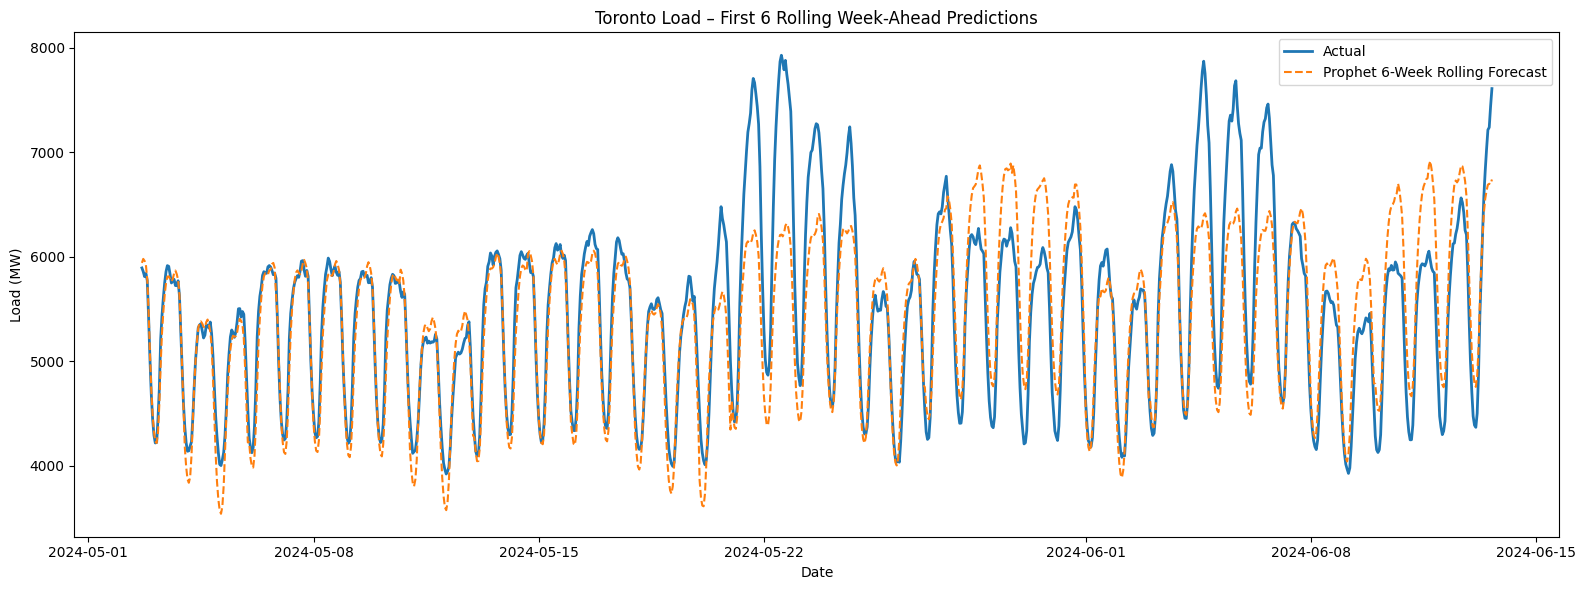

In [70]:
# --- Prophet Rolling Week-Ahead Forecasting (6 weeks only) ---
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

forecast_horizon = 168  # 1 week ahead
max_weeks = 6            # <<< LIMIT TO SIX WEEK-AHEAD FORECASTS

full = data["toronto_data"]
exog_features = data["exog_features"]

# test set boundaries from your data prep
test = data["test"]
test_start_idx = full.index.get_loc(test.index[0])
test_end_idx = full.index.get_loc(test.index[-1])

# storage
all_forecasts = []
all_timestamps = []

current_train_end = test_start_idx
week_count = 0

# ---------------------------
# ROLLING WEEK-AHEAD LOOP (6 weeks limit)
# ---------------------------
while current_train_end < test_end_idx and week_count < max_weeks:

    # 1. Define rolling train and future slices
    train_df = full.iloc[:current_train_end]
    future_df = full.iloc[current_train_end : current_train_end + forecast_horizon]

    if len(future_df) < forecast_horizon:
        break

    # ---------------------------
    # Prepare Prophet training df
    # ---------------------------
    prophet_train = pd.DataFrame({
        "ds": train_df.index,
        "y": train_df["Toronto"]
    })
    
    for col in exog_features:
        prophet_train[col] = train_df[col].values

    # ---------------------------
    # Build Prophet model
    # ---------------------------
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        changepoint_prior_scale=0.05,
        seasonality_prior_scale=10,
        interval_width=0.95
    )

    for col in exog_features:
        model.add_regressor(col)

    model.fit(prophet_train)

    # ---------------------------
    # Build future_dataframe
    # ---------------------------
    prophet_future = pd.DataFrame({"ds": future_df.index})
    for col in exog_features:
        prophet_future[col] = future_df[col].values

    # ---------------------------
    # Forecast 168 hours
    # ---------------------------
    forecast = model.predict(prophet_future)

    all_forecasts.append(forecast["yhat"].values)
    all_timestamps.append(future_df.index.values)

    # Move forward one week
    current_train_end += forecast_horizon
    week_count += 1

# ---------------------------
# CONCATENATE ONLY 6 WEEKS OF FORECASTS
# ---------------------------
preds = np.concatenate(all_forecasts)
pred_times = np.concatenate(all_timestamps)

pred_series = pd.Series(preds, index=pred_times)
actual_series = full.loc[pred_series.index, "Toronto"]

# ---------------------------
# EVALUATE
# ---------------------------
rmse = np.sqrt(mean_squared_error(actual_series, pred_series))
print(f"Rolling Week-Ahead RMSE for 6 weeks: {rmse:.2f}")

# ---------------------------
# PLOT RESULTS
# ---------------------------
plt.figure(figsize=(16, 6))
plt.plot(actual_series.index, actual_series.values, label="Actual", linewidth=2)
plt.plot(pred_series.index, pred_series.values, label="Prophet 6-Week Rolling Forecast", linestyle="--")
plt.title("Toronto Load – First 6 Rolling Week-Ahead Predictions")
plt.xlabel("Date")
plt.ylabel("Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
print(f"Prophet RMSE for week-ahead forecast: {rmse:.2f}")

Prophet RMSE for week-ahead forecast: 439.89


In [45]:
print(toronto_data.index[0], toronto_data.index[-1])
print(test.index[0], test.index[-1])


2018-01-08 00:00:00 2024-12-31 23:00:00
2024-05-02 16:00:00 2024-12-31 23:00:00
